In [103]:
import zipfile

# Path to results zip file
zip_path = './results/20250408-154157_2_5_10_TFT_TFT.zip'
# Where to extract the contents
extract_to = './results'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [109]:
import pandas as pd
from typing import List, Union, Dict
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pickle as pkl

In [111]:
def whole_feature_object_to_search_feature_format(agent_log_file, feature_category):
    # logs = List[Dict[str, Dict[int, FeatureActivations]]]
    # List1 has length num runs, Dict1 has kes as feature category
    # Dict2 has keys as IPD round, values as FeatureActivations object
    # Desired conversion format is List[List[Dict[str, Union[str, Feature, int]]]]
    # a list of list of dictionaries, each dictionary contains the log for one run and exeriment
    with open(agent_log_file, 'rb') as f:
            whole_logs = pkl.load(f)
    logs = []
    for run_id, run_dict in enumerate(whole_logs):
        run_list = []
        if feature_category not in run_dict:
            raise ValueError(f"Feature category: {feature_category} not found in the log.")
        if feature_category == "search_features":
            logs.append(run_dict[feature_category])
            continue
        sub_dict = run_dict[feature_category]  # type: Dict[int, FeatureActivations]
        # sub_dict keys are IPD run indices, values are feature activation objects
        for ipd_round, feature_obj in sub_dict.items():
            if feature_category == "top_features":
                feature_obj = feature_obj._acts
            else:
                feature_obj = list(map(lambda x: x[1], feature_obj))
            features_data = [{
                "feature": feature_obj[i].feature,
                "round_id": ipd_round,
                "activation": feature_obj[i].activation,
                "experiment_id": agent_log_file.split('/')[-1],
                "run_idx": run_id,
                "property": feature_category,
            } for i in range(len(feature_obj))]
            run_list.extend(features_data)
        logs.append(run_list)
    return logs

In [113]:
converted_whole_feats = whole_feature_object_to_search_feature_format('results/20250409-120741_Steering_AC_AD/A_0_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl', 
                                                                      'top_features')
len(converted_whole_feats), len(converted_whole_feats[0]), converted_whole_feats[0]

(5,
 200,
 [{'feature': Feature("Game theory concepts involving cooperation versus competition"),
   'round_id': 1,
   'activation': 1.3436908143939394,
   'experiment_id': 'A_0_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl',
   'run_idx': 0,
   'property': 'top_features'},
  {'feature': Feature("References to imprisonment or being sent to jail"),
   'round_id': 1,
   'activation': 1.1473460477941178,
   'experiment_id': 'A_0_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl',
   'run_idx': 0,
   'property': 'top_features'},
  {'feature': Feature("Criminal sentences and imprisonment terms in legal contexts"),
   'round_id': 1,
   'activation': 1.1078404017857142,
   'experiment_id': 'A_0_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl',
   'run_idx': 0,
   'property': 'top_features'},
  {'feature': Feature("The assistant is providing a list of options"),
   'round_id': 1,
   'activation': 1.039207175

In [114]:
converted_whole_feats = whole_feature_object_to_search_feature_format('results/20250409-120741_Steering_AC_AD/A_1_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl', 
                                                                      'top_features')
len(converted_whole_feats), len(converted_whole_feats[0]), converted_whole_feats[0]

(5,
 200,
 [{'feature': Feature("Game theory concepts involving cooperation versus competition"),
   'round_id': 1,
   'activation': 1.1817776864035088,
   'experiment_id': 'A_1_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl',
   'run_idx': 0,
   'property': 'top_features'},
  {'feature': Feature("References to imprisonment or being sent to jail"),
   'round_id': 1,
   'activation': 1.0803970025510203,
   'experiment_id': 'A_1_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl',
   'run_idx': 0,
   'property': 'top_features'},
  {'feature': Feature("German compound word components and suffixes"),
   'round_id': 1,
   'activation': 1.0235849056603774,
   'experiment_id': 'A_1_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl',
   'run_idx': 0,
   'property': 'top_features'},
  {'feature': Feature("Evading consequences or getting away with wrongdoing"),
   'round_id': 1,
   'activation': 0.9581988790760869

In [115]:
log_file_path = 'results/20250409-120741_Steering_AC_AD/_exp_20250409-120741_runs_10_strat_AC_AD_sim_type_features_agent_A_0_20250409-130501_features_99.pickle'
with open(log_file_path, 'rb') as f:
    search_features_results = pkl.load(file=f)

In [116]:
len(search_features_results), len(search_features_results[0]), search_features_results[0]

(5,
 1600,
 [{'experiment_id': '20250409-120741_runs_10_strat_AC_AD_sim_type_features',
   'run_idx': 0,
   'round_id': 1,
   'property': '"Emergent deceptive behavior',
   'feature': Feature("Contexts involving deception, lying, or questioning truthfulness"),
   'activation': 0.5279541015625},
  {'experiment_id': '20250409-120741_runs_10_strat_AC_AD_sim_type_features',
   'run_idx': 0,
   'round_id': 1,
   'property': '"Emergent deceptive behavior',
   'feature': Feature("Discussion of manipulation, fraud, or deceptive behavior"),
   'activation': 0.4052734375},
  {'experiment_id': '20250409-120741_runs_10_strat_AC_AD_sim_type_features',
   'run_idx': 0,
   'round_id': 1,
   'property': '"Emergent deceptive behavior',
   'feature': Feature("Descriptions of manipulative or cunning behavior"),
   'activation': 0.3299893465909091},
  {'experiment_id': '20250409-120741_runs_10_strat_AC_AD_sim_type_features',
   'run_idx': 0,
   'round_id': 1,
   'property': '"Emergent deceptive behavior',

In [117]:
def get_feature_activation_scores_for_agent(feature: Union[str, int], agent_log_file: str, feature_category: str=None) -> Dict[str, np.ndarray]:
    """
    Parses the agent log file and returns a list of the number of tokens in which the feature is active for the given agent.
    Note: The file contains logs from multiple runs on the same agent, hence the activations of the feature will be return for all runs.
    """
    if feature_category is not None:
        logs = whole_feature_object_to_search_feature_format(agent_log_file, feature_category)
    else:
        with open(agent_log_file, 'rb') as f:
            logs = pkl.load(f)
        
    # logs is a list of list of dictionaries, each dictionary contains the log for one run and exeriment
    # scores[run_id][experiment_id] = [feature activations for experiment_id and run_id]
    scores = defaultdict(lambda: defaultdict(dict))
    for run_id, features_log in enumerate(logs):
        for log in features_log:
            experiment_id, round_id = log['experiment_id'], log['round_id']
            if log['feature'].label == feature:
                # by default, save for the last IPD round
                scores[experiment_id][run_id] = log['activation']
    for experiment_id in scores.keys():
        num_runs = len(scores[experiment_id])
        assert num_runs == max(scores[experiment_id].keys())+1, f"Experiment {experiment_id} has missing runs."
        scores[experiment_id] = np.array([scores[experiment_id][run_id] for run_id in range(num_runs)])
    return scores

def get_cooperation_rates(results_csv_file: str, agents: tuple=None) -> List[float]:
    """
    Parses the results CSV file and returns the cooperation rate
    for the given agent across multiple runs.

    columns: Round, A_0 Move, A_0 Payoff, A_0 Cumulative, A_0 Reason,
             A_1 Move, A_1 Payoff, A_1 Cumulative, A_1 Reason, ...
    """
    results = pd.read_csv(results_csv_file)
    if 'Experiment_id' not in results.columns:
        # add experiment id column if not present
        results['Experiment_id'] = 0
    if agents is None:
        agents = ['A_0', 'A_1']
    # parse the CSV to extract cooperation rates per run
    cooperation_rates = [{} for experiment_id in results['Experiment_id'].unique()]
    for experiment_id in results['Experiment_id'].unique():
        experiment_results = results[results['Experiment_id'] == experiment_id]
        # calculate cooperation rate for each agent
        for agent in agents:
            cooperation_rates[experiment_id][agent] = np.array((experiment_results[f'{agent} Move'] == 'Stay Silent'), dtype=int)
            cooperation_rates[experiment_id][agent] = cooperation_rates[experiment_id][agent].cumsum()
            for i, coop_value in enumerate(cooperation_rates[experiment_id][agent]):
                cooperation_rates[experiment_id][agent][i] = coop_value / (i + 1)  # calculate cooperation rate 
    return cooperation_rates

In [118]:
def bootstrap_confidence_interval(data, num_samples=10000, confidence_level=0.95, random_seed=None):
    """
    Computes the confidence interval for the mean of the data using bootstrap resampling.
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    data = np.array(data)
    n = len(data)
    boot_means = [np.mean(np.random.choice(data, size=n, replace=True)) for _ in range(num_samples)]

    alpha = 1 - confidence_level
    lower = np.percentile(boot_means, 100 * (alpha / 2))
    upper = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lower, upper


def plot_statistic(statistic_name: str,
                   data: Union[list[list[float]], np.ndarray],
                   use_bootstrap: bool = True,
                   num_bootstrap_samples: int = 10000,
                   confidence_level: float = 0.95,
                   save_path: str = None,
                   fmt : str = '-o'):
    """
    Plots the mean ± error for each index across multiple runs.

    Parameters:
    - statistic_name: Name for plot title.
    - data: 2D list (shape: [num_runs][num_features_or_rounds]) or numpy array.
    - use_bootstrap: Whether to use bootstrap CI instead of standard deviation.
    - save_path: Optional file path to save the plot.
    """

    data = np.array(data)  # Shape: (num_runs, num_features_or_rounds)
    num_points = data.shape[1]

    means = np.mean(data, axis=0) # Shape: (num_features_or_rounds,)
    if use_bootstrap:
        ci_lowers, ci_uppers = [], []
        for i in range(num_points):
            # Calculate bootstrap confidence interval for each feature/round
            lower, upper = bootstrap_confidence_interval(data[:, i],
                                                         num_samples=num_bootstrap_samples,
                                                         confidence_level=confidence_level)
            ci_lowers.append(means[i] - lower)
            ci_uppers.append(upper - means[i])
        yerr = [ci_lowers, ci_uppers]
    else:
        stds = np.std(data, axis=0, ddof=1)
        yerr = [stds, stds]

    x = np.arange(num_points)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.errorbar(x, means, yerr=yerr, fmt=fmt, capsize=5, color='blue', ecolor='red', elinewidth=1.5)

    ax.set_title(f"{statistic_name} (Mean ± {'95% CI' if use_bootstrap else 'Std'})")
    ax.set_xlabel("Feature / Round Index")
    ax.set_ylabel("Value")
    ax.set_xticks(x)

    plt.grid(True, linestyle='--', alpha=0.6)

    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    else:
        plt.show()

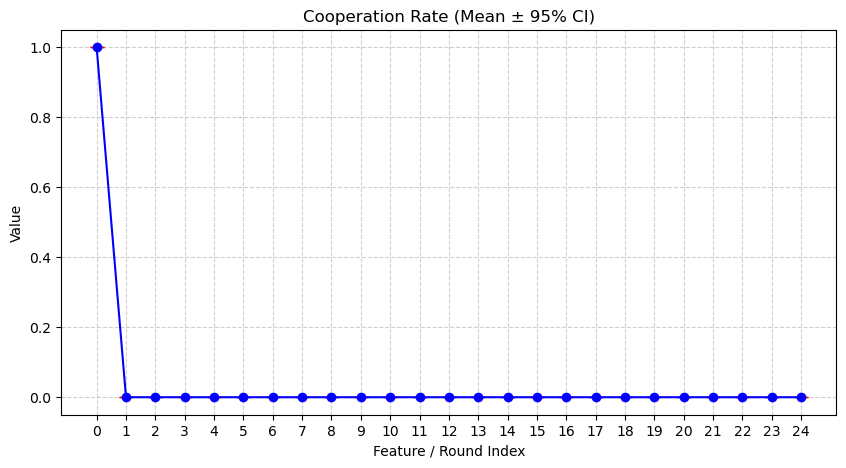

In [119]:
plot_statistic(statistic_name="Cooperation Rate",
                   data=np.array(get_cooperation_rates("./results/20250409-120741_Steering_AC_AD/results_features_10_20250409-130501.csv")[0]['A_0'][:25]).reshape(1, -1),
                   use_bootstrap=True,
                   save_path="cooperation_rate.png")

In [120]:
def plot_bar_activations(
    data: Union[np.ndarray, list],
    agent_names: List[str],
    features_of_interest: List[str],
    title: str = "Feature Activations (Mean ± 95% CI)",
    use_bootstrap: bool = True,
    num_bootstrap_samples: int = 10000,
    confidence_level: float = 0.95,
    save_path: str = None
):
    """
    Creates a grouped bar chart for average activation values (and error bars) for n agents × m features.

    Parameters
    ----------
    data : np.ndarray or list
        3D structure with shape (n_agents, n_runs, m_features)
        - data[i] = runs for agent i, shape (n_runs, m_features)
    agent_names : list of str
        A list of length n_agents, naming each agent
    features_of_interest : list of str
        A list of length m_features, naming each feature
    title : str
        Plot title
    use_bootstrap : bool
        Whether to compute error bars via bootstrap or standard deviation
    num_bootstrap_samples : int
        Number of bootstrap samples (if use_bootstrap=True)
    confidence_level : float
        Confidence level (e.g., 0.95) for bootstrap intervals
    save_path : str
        If provided, save the figure to this path, else plt.show().
    """

    data = np.array(data)  # shape -> (n_agents, n_runs, m_features)
    n_agents, n_runs, m_features = data.shape

    # For each (agent, feature), compute mean + confidence interval.
    means = np.zeros((n_agents, m_features))
    lower_err = np.zeros((n_agents, m_features))
    upper_err = np.zeros((n_agents, m_features))

    for i in range(n_agents):
        for j in range(m_features):
            vals = data[i, :, j]
            mval = np.mean(vals)
            means[i, j] = mval
            if use_bootstrap:
                ci_low, ci_high = bootstrap_confidence_interval(vals,
                                                               num_samples=num_bootstrap_samples,
                                                               confidence_level=confidence_level)
                lower_err[i, j] = mval - ci_low
                upper_err[i, j] = ci_high - mval
            else:
                std_val = np.std(vals, ddof=1)
                lower_err[i, j] = std_val
                upper_err[i, j] = std_val

    # We’ll create a grouped bar chart: x-axis = features, each group has bars for each agent
    x = np.arange(m_features)  # positions for each feature
    bar_width = 0.8 / n_agents  # dynamic width based on the number of agents

    fig, ax = plt.subplots(figsize=(8 + m_features*0.1, 5))
    for i in range(n_agents):
        # shift each agent’s bars by i * bar_width
        offset = i * bar_width
        # yerr as [[lower_errors], [upper_errors]]
        yerr = np.vstack((lower_err[i, :], upper_err[i, :]))
        ax.bar(
            x + offset,
            means[i, :],
            bar_width,
            yerr=yerr,
            label=agent_names[i],
            capsize=4,
            alpha=0.9
        )

    ax.set_xticks(x + bar_width*(n_agents-1)/2)
    ax.set_xticklabels(features_of_interest, rotation=45, ha='right')
    ax.set_ylabel("Mean Activation")
    ax.set_title(title)
    ax.legend()  # shows agent names
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150)
    else:
        plt.show()

Features of interest: ['Game theory concepts involving cooperation versus competition', 'Probability-based decision making scenarios with explicit numerical comparisons']
A_0_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl: shape = (5,)
[1.33191574 1.37439035 1.34422718 1.35849529 1.44768066]
A_1_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl: shape = (5,)
[1.29124612 1.29124612 1.26864682 1.29124612 1.29124612]
A_1_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl: shape = (5,)
[0.71028646 0.71028646 0.67756696 0.71028646 0.71028646]
Shape of all agents data: (2, 5, 2)


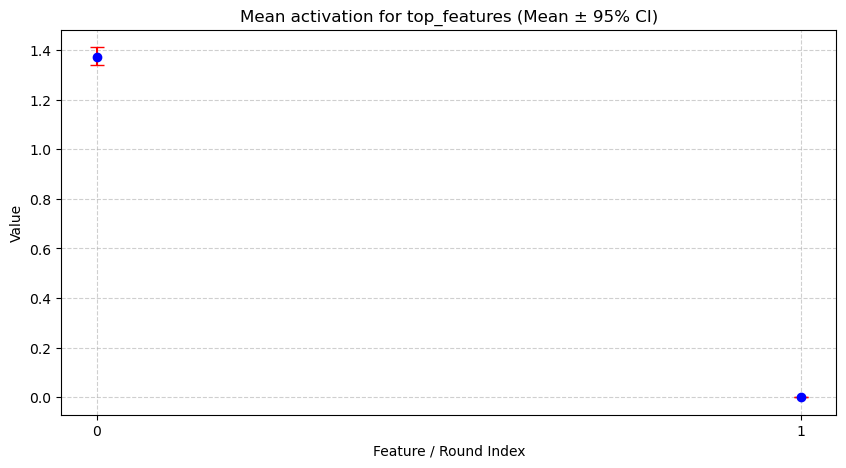

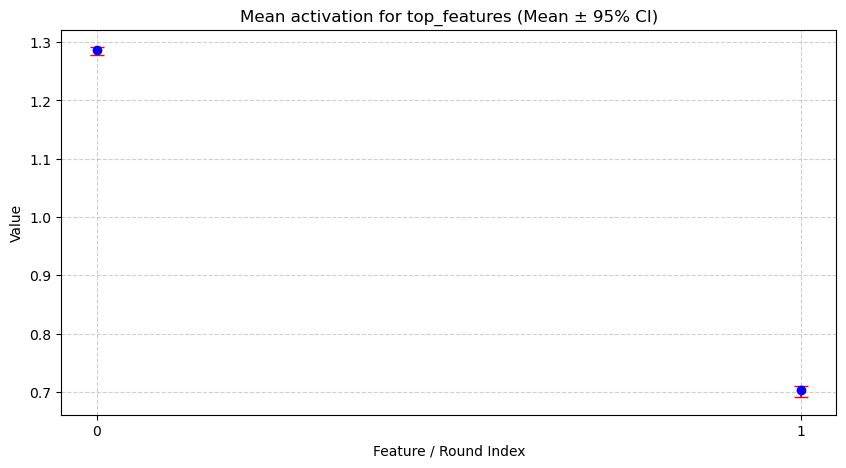

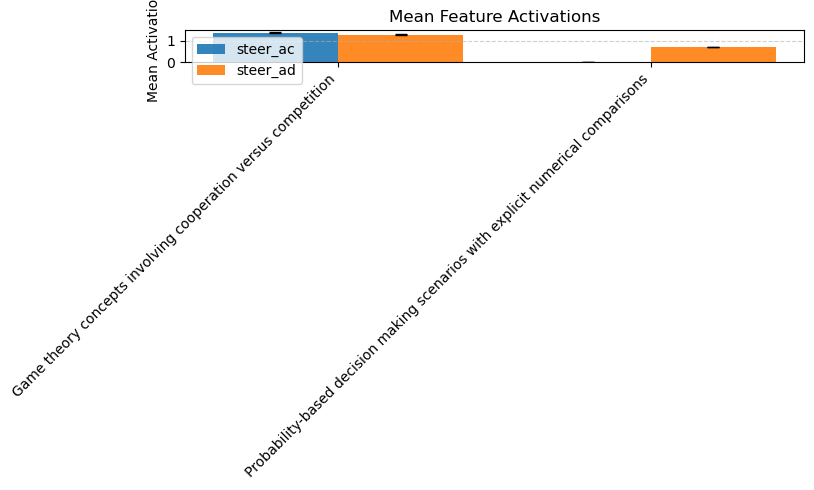

Features of interest: ['Contexts involving deception, lying, or questioning truthfulness', 'Discussion of manipulation, fraud, or deceptive behavior', 'Descriptions of manipulative or cunning behavior', 'People falling for deception or trickery', 'Strategic intelligence and cunning behavior']
20250409-102604_runs_10_strat_AC_TFT_sim_type_prompt: shape = (5,)
[0.33630371 0.33630371 0.33630371 0.33630371 0.33630371]
20250409-102604_runs_10_strat_AC_TFT_sim_type_prompt: shape = (5,)
[0.27994792 0.27604167 0.31119792 0.27604167 0.27604167]
20250409-102604_runs_10_strat_AC_TFT_sim_type_prompt: shape = (5,)
[0.16445313 0.16445313 0.16445313 0.16445313 0.16445313]
20250409-102604_runs_10_strat_AC_TFT_sim_type_prompt: shape = (5,)
[0.1476237  0.17509766 0.21228027 0.17509766 0.17509766]
20250409-102604_runs_10_strat_AC_TFT_sim_type_prompt: shape = (5,)
[0 0 0 0 0]
20250408-160352_runs_10_strat_RND_RND_sim_type_prompt: shape = (5,)
[0.31244575 0.31244575 0.31244575 0.31244575 0.31244575]
202504

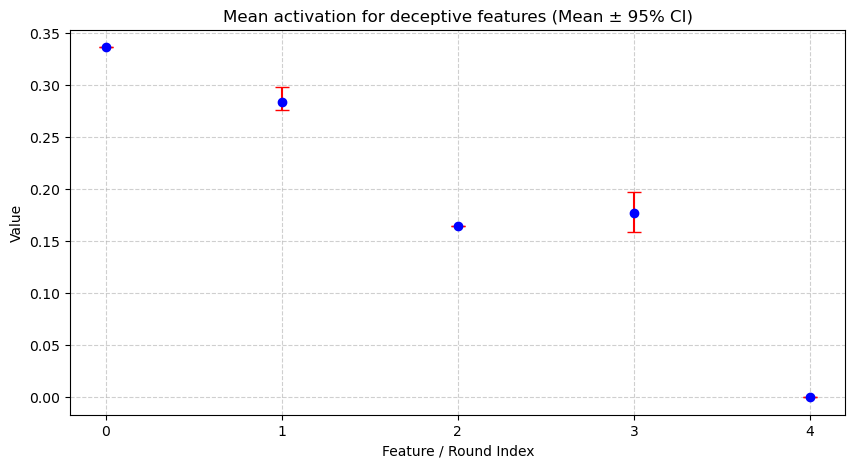

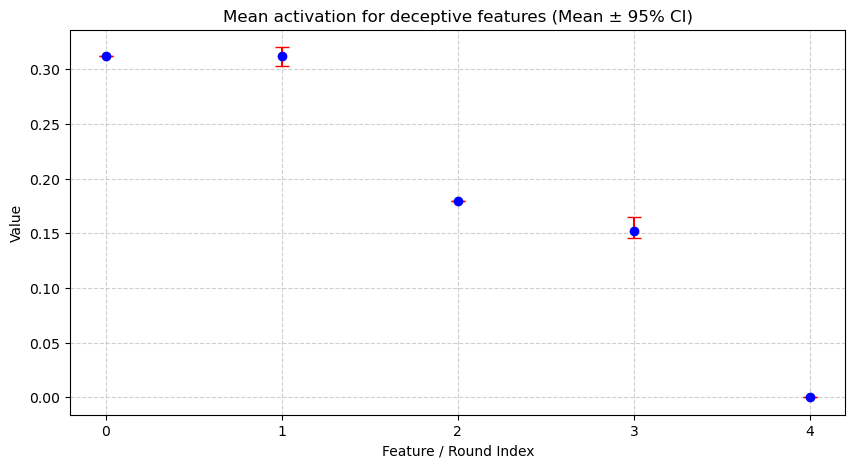

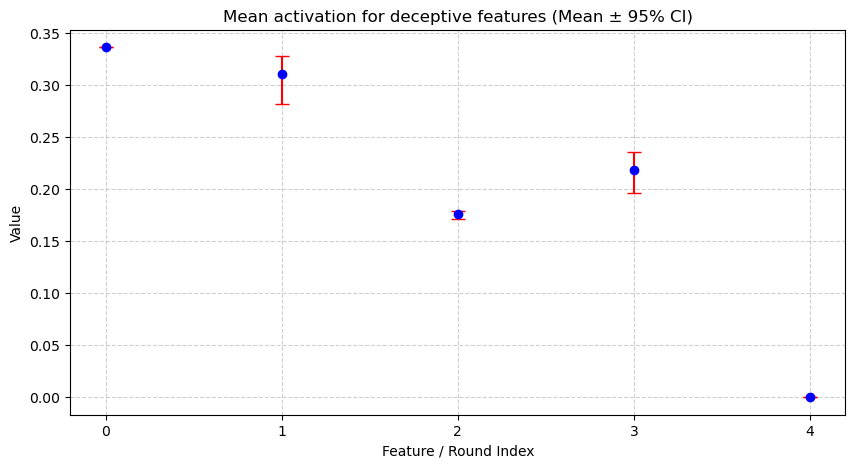

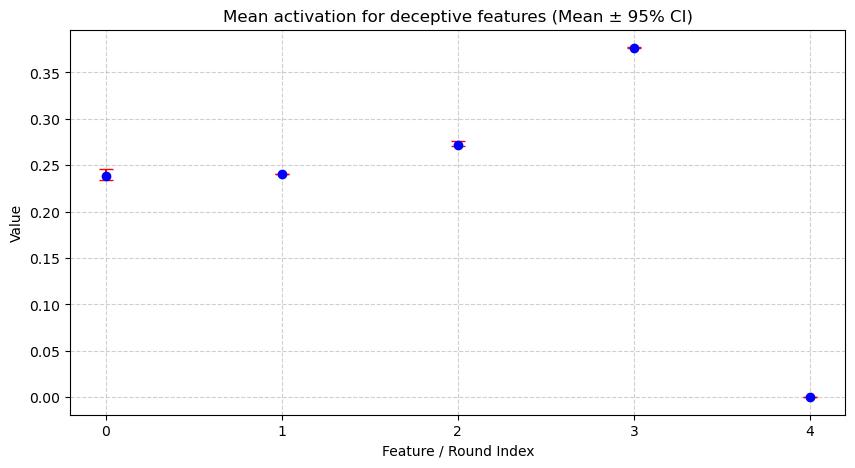

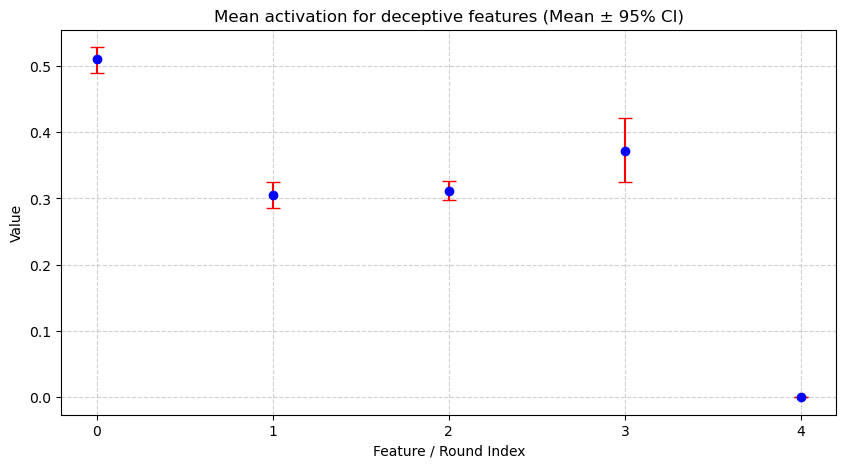

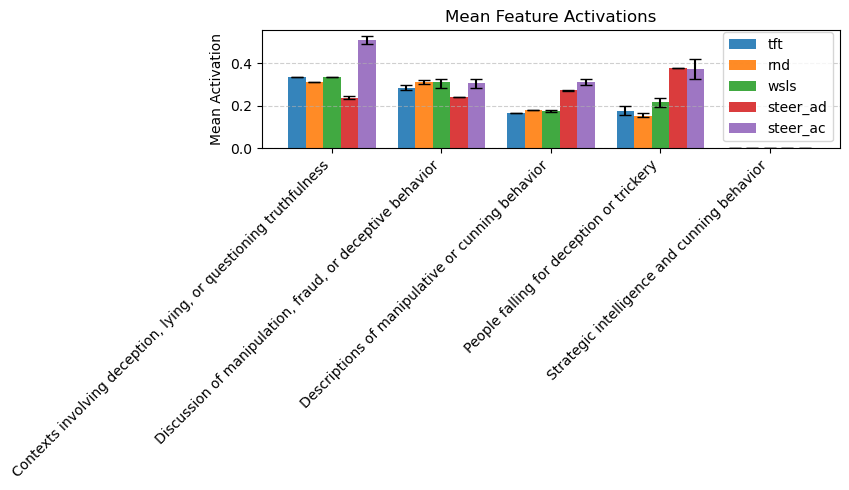

In [122]:
top_features = ["Game theory concepts involving cooperation versus competition", "Probability-based decision making scenarios with explicit numerical comparisons"]
search_deceptive_features = [search_features_results[0][0]["feature"].label,
                        search_features_results[0][1]["feature"].label,
                        search_features_results[0][2]["feature"].label,
                        search_features_results[0][3]["feature"].label,
                        search_features_results[0][5]["feature"].label
                        ]

features_lists = [top_features, search_deceptive_features]
feature_categories = ['top_features', None]
for features_of_interest, feature_category in zip(features_lists, feature_categories):
    num_runs = None
    print(f"Features of interest: {features_of_interest}")
    if feature_category == "top_features":
        agent_log_files = ["results/20250409-120741_Steering_AC_AD/A_0_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl",
                           #"results/20250408-154157_2_5_10_TFT_TFT/A_0_wholefeature_store_20250408-154157_runs_10_strat_TFT_TFT_sim_type_prompt.pkl",
                           #"results/20250408-160352_2_5_10_RND_RND/A_0_wholefeature_store_20250408-160352_runs_10_strat_RND_RND_sim_type_prompt.pkl",
                           "results/20250409-120741_Steering_AC_AD/A_1_wholefeature_store_20250409-120741_runs_10_strat_AC_AD_sim_type_features.pkl"]
        agent_names = ["steer_ac", "steer_ad"]
    else:
        agent_names = ['tft', 'rnd', 'wsls', 'steer_ad', 'steer_ac']
        agent_log_files = ["results/20250409-102604_Steering_AC_TFT/_exp_20250409-102604_runs_10_strat_AC_TFT_sim_type_prompt_agent_A_0_20250409-112529_features_99.pickle", 
                #    "results/20250408-171241/_exp_20250408-171241_runs_10_strat_NA_NA_sim_type_prompt_agent_A_1_20250408-190502_features.pickle",
                   "results/20250408-160352_2_5_10_RND_RND/_exp_20250408-160352_runs_10_strat_RND_RND_sim_type_prompt_agent_A_0_20250408-165654_features.pickle",
                #    "results/20250408-154157_2_5_10_TFT_TFT/_exp_20250408-154157_runs_10_strat_TFT_TFT_sim_type_prompt_agent_A_1_20250408-164255_features.pickle",
                   "results/20250409-090324_2_5_10_WSLS_WSLS/_exp_20250409-090324_runs_10_strat_WSLS_WSLS_sim_type_prompt_agent_A_0_20250409-095926_features_99.pickle",
                #    "results/20250408-160352_2_5_10_RND_RND/_exp_20250408-160352_runs_10_strat_RND_RND_sim_type_prompt_agent_A_1_20250408-165654_features.pickle",
                #"results/20250408-195838/_exp_20250408-195838_runs_10_strat_NA_AD_sim_type_prompt_agent_A_0_20250408-220425_features.pickle",
                "results/20250409-120741_Steering_AC_AD/_exp_20250409-120741_runs_10_strat_AC_AD_sim_type_features_agent_A_1_20250409-130501_features_99.pickle",
                "results/20250409-120741_Steering_AC_AD/_exp_20250409-120741_runs_10_strat_AC_AD_sim_type_features_agent_A_0_20250409-130501_features_99.pickle"]
    scores = {agent_name: {} for agent_name in agent_names}

    for agent_idx, agent_name in enumerate(agent_names):
        for feature in features_of_interest:
            scores[agent_name][feature] = get_feature_activation_scores_for_agent(feature=feature, 
                                                                    agent_log_file=agent_log_files[agent_idx],
                                                                    feature_category=feature_category)
            for exp_id, data in scores[agent_name][feature].items():
                print(f"{exp_id}: shape = {data.shape}")
                num_runs = data.shape[0] if num_runs is None else num_runs
                print(data)

    all_exp_scores = np.zeros((len(agent_names), len(scores[agent_names[0]][features_of_interest[0]].keys()), len(features_of_interest), num_runs))
    name = 'deceptive features' if feature_category is None else feature_category
    for agent_idx, agent_name in enumerate(agent_names):
        for feature_idx, feature in enumerate(features_of_interest):
            for experiment_idx, experiment_id in enumerate(scores[agent_name][feature].keys()):
                all_exp_scores[agent_idx, experiment_idx, feature_idx] = scores[agent_name][feature][experiment_id]

        plot_statistic(statistic_name=f"Mean activation for {name}",
                        data=all_exp_scores[agent_idx, 0].T,
                        use_bootstrap=True,
                        save_path=f"mean_activation_{name}.png",
                        fmt='o')
    print(f'Shape of all agents data: {np.transpose(all_exp_scores[:, 0], axes=(0, 2, 1)).shape}')
    plot_bar_activations(data=np.transpose(all_exp_scores[:, 0], axes=(0, 2, 1)), agent_names=agent_names, 
                        features_of_interest=features_of_interest, 
                        title="Mean Feature Activations")

## Statistical tests for the difference in means

In [123]:
def test_significance_between_agents(agent1_scores: Union[list, np.ndarray],
                                     agent2_scores: Union[list, np.ndarray],
                                     alpha: float = 0.05,
                                     use_bootstrap: bool = True,
                                     num_bootstrap_samples: int = 10000,
                                     confidence_level: float = 0.95,
                                     random_seed: int = None):
    """
    Tests whether the difference in mean cooperation rate between two agents is statistically significant,
    using bootstrap by default, and reports effect size (Cohen's d).

    Parameters:
    - agent1_scores: List or array of cooperation rates for agent 1.
    - agent2_scores: List or array of cooperation rates for agent 2.
    - alpha: Significance level (default = 0.05)
    - use_bootstrap: Whether to use bootstrap test instead of Welch’s t-test (default = True)
    - num_bootstrap_samples: Number of bootstrap resamples
    - confidence_level: Confidence level for bootstrap
    - random_seed: Random seed for reproducibility
    """

    agent1_scores = np.array(agent1_scores)
    agent2_scores = np.array(agent2_scores)

    mean1 = np.mean(agent1_scores)
    mean2 = np.mean(agent2_scores)
    diff_observed = mean1 - mean2

    # Calculate pooled standard deviation for effect size (Cohen's d)
    pooled_std = np.sqrt(((np.std(agent1_scores, ddof=1) ** 2 + np.std(agent2_scores, ddof=1) ** 2) / 2))
    cohen_d = diff_observed / pooled_std if pooled_std > 0 else float("inf")

    print(f"Agent 1 mean: {mean1:.4f}")
    print(f"Agent 2 mean: {mean2:.4f}")
    print(f"Observed difference: {diff_observed:.4f}")
    print(f"Cohen's d (effect size): {cohen_d:.4f}")

    if use_bootstrap:
        if random_seed is not None:
            np.random.seed(random_seed)

        combined = np.concatenate([agent1_scores, agent2_scores])
        n1 = len(agent1_scores)
        observed_diff = mean1 - mean2

        diffs = []
        for _ in range(num_bootstrap_samples):
            permuted = np.random.permutation(combined)
            new1 = permuted[:n1]
            new2 = permuted[n1:]
            diffs.append(np.mean(new1) - np.mean(new2))

        diffs = np.array(diffs)
        p_val = np.mean(np.abs(diffs) >= np.abs(observed_diff))
        print(f"Bootstrap p-value: {p_val:.4f} (samples = {num_bootstrap_samples})")

        # Confidence interval for difference in means
        lower = np.percentile(diffs, 100 * (1 - confidence_level) / 2)
        upper = np.percentile(diffs, 100 * (1 + confidence_level) / 2)
        print(f"{int(confidence_level * 100)}% CI for difference in means: [{lower:.4f}, {upper:.4f}]")
    else:
        from scipy.stats import ttest_ind
        t_stat, p_val = ttest_ind(agent1_scores, agent2_scores, equal_var=False)
        print(f"Welch’s t-test p-value: {p_val:.4f}")

    if p_val < alpha:
        print(f"✅ Statistically significant difference at α = {alpha}")
    else:
        print(f"❌ No statistically significant difference at α = {alpha}")
test_significance_between_agents(agent1_scores=all_exp_scores[0,0,0],
                                     agent2_scores=all_exp_scores[1,0,0],
                                     alpha=0.05,
                                     use_bootstrap=True,
                                     num_bootstrap_samples=10000,
                                     confidence_level=0.95,
                                     random_seed=42)

Agent 1 mean: 0.3363
Agent 2 mean: 0.3124
Observed difference: 0.0239
Cohen's d (effect size): inf
Bootstrap p-value: 0.0086 (samples = 10000)
95% CI for difference in means: [-0.0143, 0.0143]
✅ Statistically significant difference at α = 0.05
